In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# Step 2: Load the CIFAR-10 dataset
# CIFAR-10 dataset has 60,000 32x32 color images in 10 categories.
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert class labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print the shape of training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [ ]:
# Step 3: Define the CNN model architecture
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten the feature maps
    Flatten(),

    # Fully Connected Layers
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout for regularization
    Dense(10, activation='softmax')  # Output layer for 10 classes
])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,202 (625.79 KB)

 Trainable params: 160,202 (625.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile the model
# Use Adam optimizer and categorical crossentropy loss
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Step 5: Train the CNN model
# Train the model for 10 epochs with batch size of 64
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test),
                    batch_size=64)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 92ms/step - accuracy: 0.2817 - loss: 1.9031 - val_accuracy: 0.4910 - val_loss: 1.4551
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5054 - loss: 1.3740 - val_accuracy: 0.5761 - val_loss: 1.2000
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 68s 87ms/step - accuracy: 0.5715 - loss: 1.2005 - val_accuracy: 0.6225 - val_loss: 1.0606
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 89ms/step - accuracy: 0.6196 - loss: 1.0815 - val_accuracy: 0.6551 - val_loss: 0.9745
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 69s 89ms/step - accuracy: 0.6557 - loss: 0.9842 - val_accuracy: 0.6741 - val_loss: 0.9202
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 86ms/step - accuracy: 0.6846 - loss: 0.9063 - val_accuracy: 0.6815 - val_loss: 0.9135
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 91ms/step - accuracy: 0.7030 - loss: 0.8501 - val_accuracy: 0.6918 - val_loss: 0.8865
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.7175 - loss: 0.8000 - 

In [ ]:
# Step 6: Evaluate the model performance
# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.7121 - loss: 0.8395
Test Loss: 0.8375
Test Accuracy: 71.52%


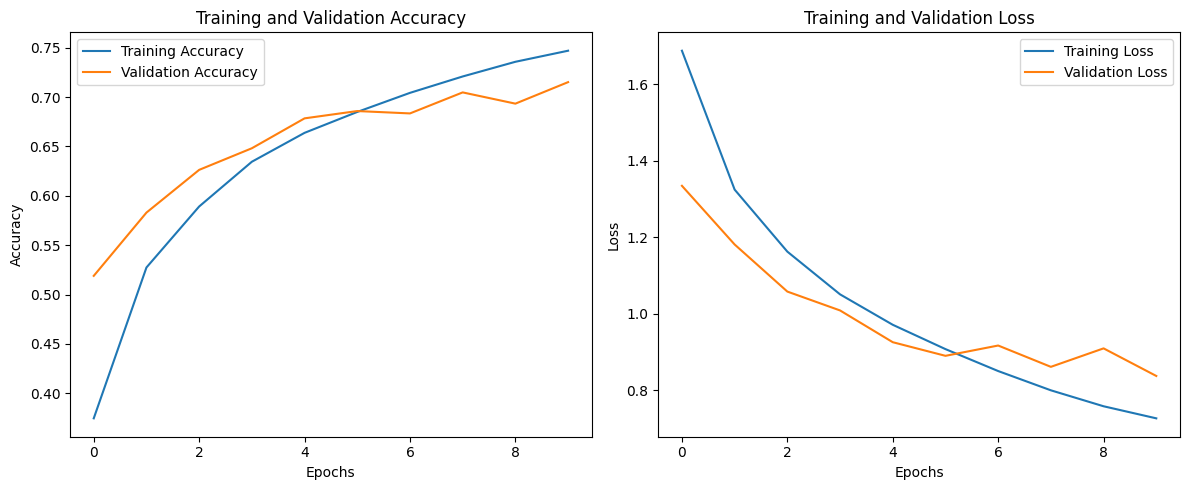

In [ ]:
# Step 7: Visualize training and validation accuracy/loss
# Plot accuracy and loss

plt.figure(figsize=(12, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')